### Import Libraries

In [106]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score, classification_report
from sklearn.metrics import RocCurveDisplay

import matplotlib.pyplot as plt
import plotly.express as px

### Read and Transform Data

In [50]:
path = "/kaggle/input/car-insurance-data/Car_Insurance_Claim.csv"

df = pd.read_csv(path)
df = df.drop(columns="ID")
df = df.dropna()

In [51]:
df = pd.get_dummies(df, drop_first=True, dtype=float)

### Split Data

In [111]:
y = df.loc[:, "OUTCOME"]
X = df.drop(columns="OUTCOME")

X.shape

(8149, 24)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [113]:
X_train.shape, X_test.shape

((6111, 24), (2038, 24))

In [114]:
X_train.head()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,AGE_26-39,...,DRIVING_EXPERIENCE_10-19y,DRIVING_EXPERIENCE_20-29y,DRIVING_EXPERIENCE_30y+,EDUCATION_none,EDUCATION_university,INCOME_poverty,INCOME_upper class,INCOME_working class,VEHICLE_YEAR_before 2015,VEHICLE_TYPE_sports car
2708,0.417153,0.0,1.0,0.0,10238,11000.0,0,0,0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
6782,0.518991,0.0,1.0,0.0,10238,12000.0,0,0,3,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7755,0.675370,0.0,0.0,1.0,32765,14000.0,5,2,0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1812,0.606835,1.0,1.0,1.0,10238,11000.0,5,0,4,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5069,0.560121,1.0,0.0,1.0,10238,15000.0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


### EDA

In [95]:
# Train target distribution
fig = px.histogram(y_train)
fig.update_traces(xbins={"size": 0.25})
fig.show()

In [96]:
# Test target distribution
fig = px.histogram(y_test)
fig.update_traces(xbins={"size": 0.25})
fig.show()

### Fit Model on Train

In [64]:
model = LogisticRegression()

In [65]:
model.fit(X_train, y_train)

LogisticRegression()

### Predict Model

In [115]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

**Train**

In [116]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.86      4239
         1.0       0.69      0.60      0.64      1872

    accuracy                           0.79      6111
   macro avg       0.76      0.74      0.75      6111
weighted avg       0.79      0.79      0.79      6111



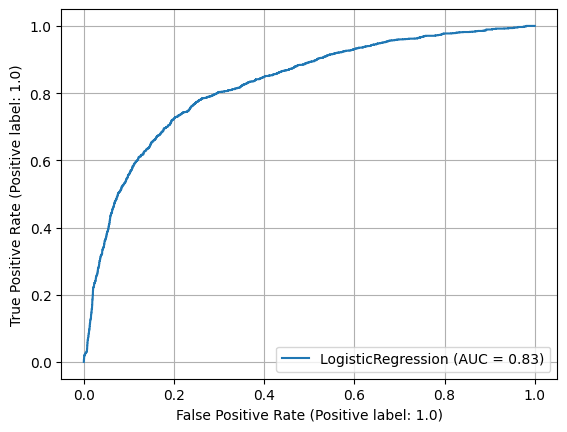

In [160]:
fig = RocCurveDisplay.from_estimator(model, X_train, y_train, )
plt.grid()
plt.show()

**Test**

In [161]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85      1374
         1.0       0.71      0.61      0.66       664

    accuracy                           0.79      2038
   macro avg       0.77      0.74      0.75      2038
weighted avg       0.79      0.79      0.79      2038



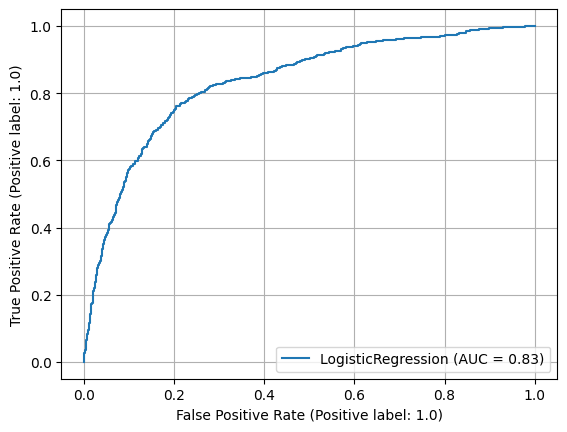

In [162]:
fig = RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.grid()
plt.show()